In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print(y_train[0])

5


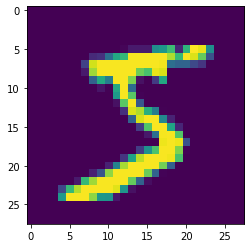

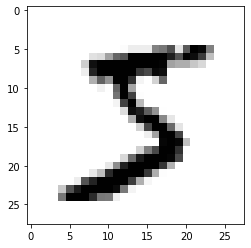

In [7]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

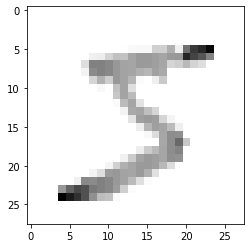

In [8]:
#Normalization is a pre-processing technique used to standardize data
#Normalizing the data generally increases the learning speed and leads to faster convergence.
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("train",x_trainr.shape)
print("test",x_testr.shape)

train (60000, 28, 28, 1)
test (10000, 28, 28, 1)


In [14]:
model=Sequential()

#convolutional layer applies various kernels on the image to extract or identify important features
#that we will feed into the neural network

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))

#ReLU for short is a piecewise linear function that will output the input directly if it is positive,
#otherwise, it will output zero
#sigmoid and hyperbolic tangent activation functions cannot be used in networks with many layers
#due to the vanishing gradient problem.
#relu function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.

model.add(Activation('relu'))

#pooling helps reduce the spatial size of an image to reduce the amount of parameters when computing for the output
#reducing the dimensions (down sampling) helps in reducing the computational cost of the neural network

model.add(MaxPooling2D(pool_size=(2,2)))

#dropouts ignore a percentage of the 'neurons' in each layers.
#this helps in preventing overfitting the training data

model.add(Dropout(0.25))

#Flattening is converting the data into a 1-dimensional array for inputting it to the next layer(fully connected layer)

model.add(Flatten())

#Dense Layer is layer of neurons in which each neuron receives input from all the neurons of previous layer
#Dense Layer is used to classify image based on output features from convolutional layers.

model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))

#it converts the scores to a normalized probability distribution
#class with the maximum probability is the mapped class to the image
model.add(Activation('softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                692288    
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0

In [16]:
#loss function, that can be used to estimate the loss of the model 
#so that the weights can be updated to reduce the loss on the next evaluation.

#Use this crossentropy loss function when there are two or more label classes.
#We expect labels to be provided as integers

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Optimizers are Classes or methods used to change the attributes of the machine/deep learning model
#such as weights and learning rate in order to reduce the losses

#Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models
#takes into consideration the ‘exponentially weighted average’ of the gradients
#helps in faster convergence towards minima

In [17]:
model.fit(x_trainr,y_train,epochs=10,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 46s 1ms/sample - loss: 0.5192 - acc: 0.8408 - val_loss: 0.1499 - val_acc: 0.9563
Epoch 2/10
42000/42000 [==============================] - 46s 1ms/sample - loss: 0.2582 - acc: 0.9229 - val_loss: 0.1033 - val_acc: 0.9675
Epoch 3/10
42000/42000 [==============================] - 47s 1ms/sample - loss: 0.2083 - acc: 0.9370 - val_loss: 0.0898 - val_acc: 0.9727
Epoch 4/10
42000/42000 [==============================] - 45s 1ms/sample - loss: 0.1825 - acc: 0.9438 - val_loss: 0.0855 - val_acc: 0.9742
Epoch 5/10
42000/42000 [==============================] - 45s 1ms/sample - loss: 0.1613 - acc: 0.9495 - val_loss: 0.0774 - val_acc: 0.9778
Epoch 6/10
42000/42000 [==============================] - 47s 1ms/sample - loss: 0.1526 - acc: 0.9538 - val_loss: 0.0773 - val_acc: 0.9783
Epoch 7/10
42000/42000 [==============================] - 45s 1ms/sample - loss: 0.1389 - acc: 0.9563 - val_loss: 0.

In [18]:
#HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy
model.save('mnist.h5')
#can be loaded using
#from tensorflow.keras.models import load_model
#model = load_model('mnist.h5')

In [19]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print('Test Loss on test samples',test_loss)
print('Validation Accuracy on test samples',test_acc)

10000/10000 [==============================] - 2s 223us/sample - loss: 0.0741 - acc: 0.9818
Test Loss on test samples 0.07410192356174812
Validation Accuracy on test samples 0.9818


In [20]:
predictions=model.predict([x_testr])

In [21]:
print(predictions)

[[1.0151207e-14 1.0396656e-10 1.6009054e-08 ... 1.0000000e+00
  4.6360169e-11 1.6194058e-08]
 [3.6593772e-10 6.0381522e-06 9.9999392e-01 ... 8.0866988e-12
  5.4027464e-13 7.5747430e-16]
 [7.3261227e-13 9.9999988e-01 2.4548898e-09 ... 8.6867225e-09
  1.0285011e-08 8.7904631e-12]
 ...
 [4.2054658e-12 1.1591877e-08 8.7669303e-09 ... 2.7586660e-07
  7.7479683e-07 3.3954155e-05]
 [1.7396363e-14 1.4246365e-12 1.3948848e-12 ... 2.6551279e-15
  1.1246483e-06 2.1959240e-11]
 [1.9313775e-09 2.4329759e-11 4.4818272e-08 ... 3.3055583e-14
  5.4489474e-10 7.3365530e-15]]


In [22]:
#softmax in training because it is differentiable and allows us to optimize a cost function
#for inference we use argmax to output a single predicted value rather than a probability
print(np.argmax(predictions[30]))

3


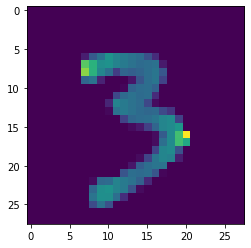

In [23]:
plt.imshow(x_test[30])

In [24]:
#Opencv is an open source library useful for computer vision applications such as video analysis,and image analysis
import cv2

In [116]:
img=cv2.imread('seven.png')

In [117]:
img.shape

(274, 164, 3)

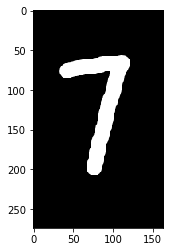

In [118]:
plt.imshow(img)

In [119]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [120]:
gray.shape

(274, 164)

In [121]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [122]:
resized.shape

(28, 28)

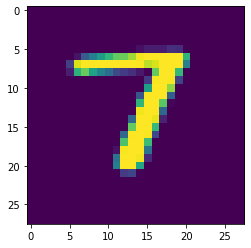

In [123]:
plt.imshow(resized)
plt.show()

In [124]:
newing=tf.keras.utils.normalize(resized,axis=1)

In [125]:
newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [126]:
newing.shape

(1, 28, 28, 1)

In [127]:
predictions=model.predict(newing)

In [128]:
print(np.argmax(predictions))

1
